# ggplot2
The ggplot2 library is part of a family of R packages called the [tidyverse](https://www.tidyverse.org/). See the [ggplot2 documentation](https://ggplot2.tidyverse.org/) for a summary of all the functions in this library. See also the [R Graphics Cookbook](https://r-graphics.org/) and the [Data Visualizations](https://r4ds.had.co.nz/data-visualisation.html) chapter of *R for Data Science* for more explanation and examples. 

In [1]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”


<div class="admonition note" name="html-admonition">
<div class="title" style="background: lightblue; padding: 10px">Note</div>
<p>If you try to execute a ggplot2 function before loading the library, you will get an error messages stating that R could not find the function.</p>
</div>

In [ ]:
# We will also be using dplr functions in the examples. 
library(dplyr)

## Set default plot dimensions
In some browsers, the plots may be too small or too big. You can control the size of the plots using the `repr` package to set the plot width and height as shown below. 

In [7]:
# Resizes all plots to 5 in by 4 in
library(repr)
options(repr.plot.width=5, repr.plot.height=4)

## Bar Charts

`ggplot(DATA_FRAME, aes(x = COLUMN)) + geom_bar()`

### Example: Number of chicks weighed on the first day
We can combine `filter()` and `ggplot` to create a bar chat that shows the number of chicks in each diet group that were weighed on the first day of the study.

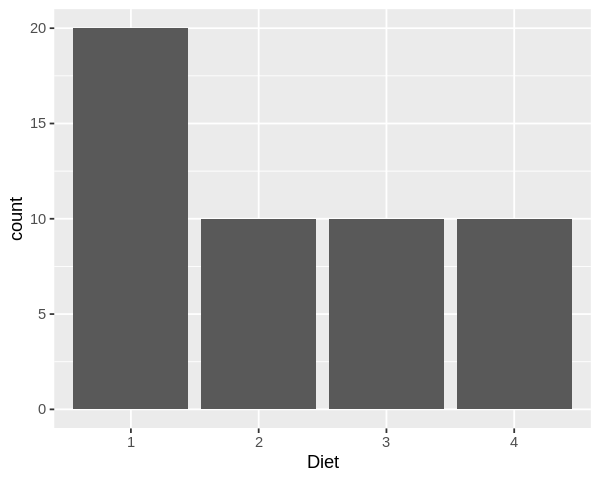

In [22]:
# without piping
ChickWeight_start <- filter(ChickWeight, Time == 0)
ggplot(ChickWeight_start, aes(x=Diet)) + geom_bar()

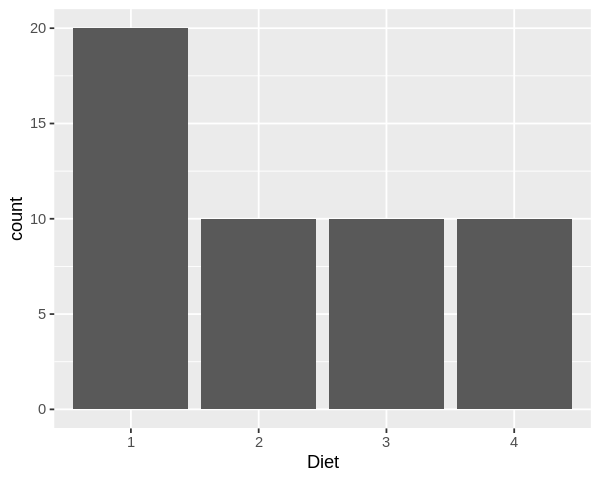

In [18]:
# with piping
ChickWeight %>%
    filter(Time == 0) %>%
    ggplot(aes(x=Diet)) +
        geom_bar()

### Example: Average weight on last day

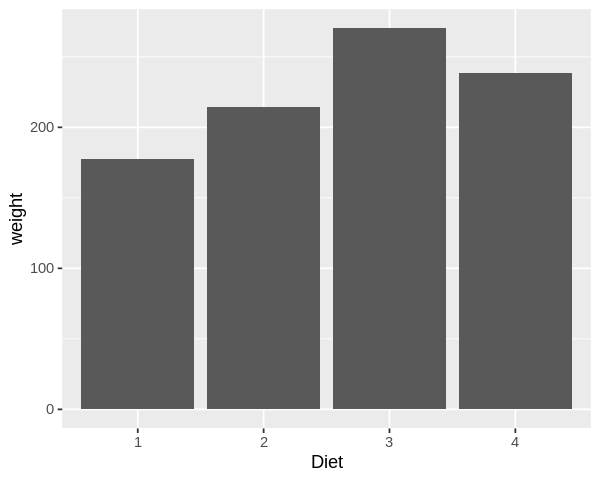

In [36]:
# Strategy 1: Use ggplot to summarize
ChickWeight %>%
    filter(Time == max(Time)) %>%
    ggplot(aes(x=Diet, y = weight)) +
        geom_bar(stat = "summary",  fun = "mean")

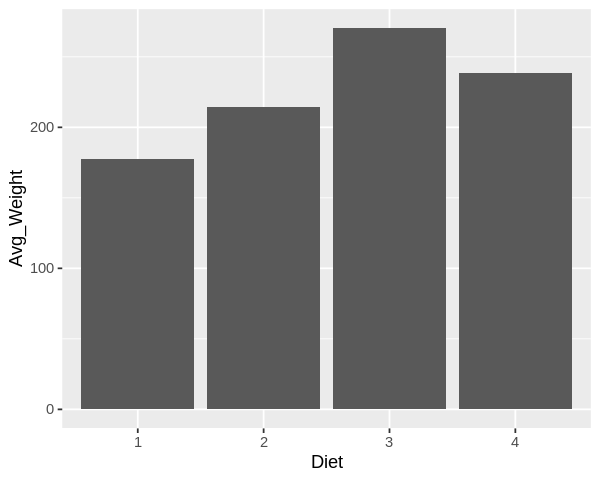

In [34]:
# Strategy 2: Generate a summary table, then plot it
ChickWeight %>%
    filter(Time == max(Time)) %>%
    group_by(Diet) %>%
    summarize(Avg_Weight = mean(weight)) %>%
    ggplot(aes(x = Diet, y = Avg_Weight)) +
        geom_bar(stat = "identity")

## Histograms

`ggplot(DATA_FRAME, aes(x = COLUMN)) + geom_histogram(bins = NUMBER_OF_BINS)`

### Example: Distribution of weights on the last day

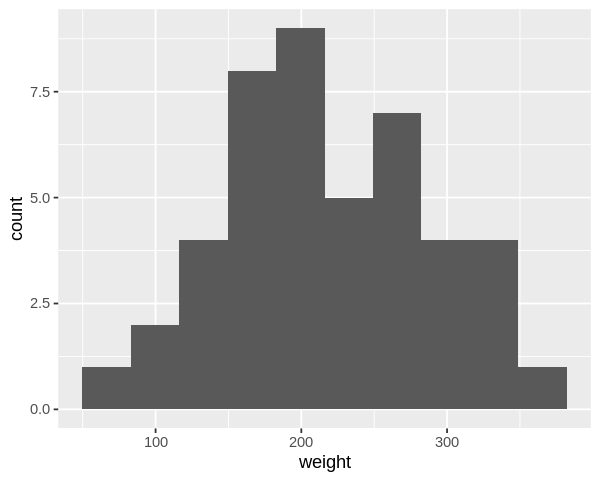

In [41]:
# without piping
ChickWeight_last_day <- filter(ChickWeight, Time == max(Time))
ggplot(ChickWeight_last_day, aes(x = weight)) + geom_histogram(bins = 10)

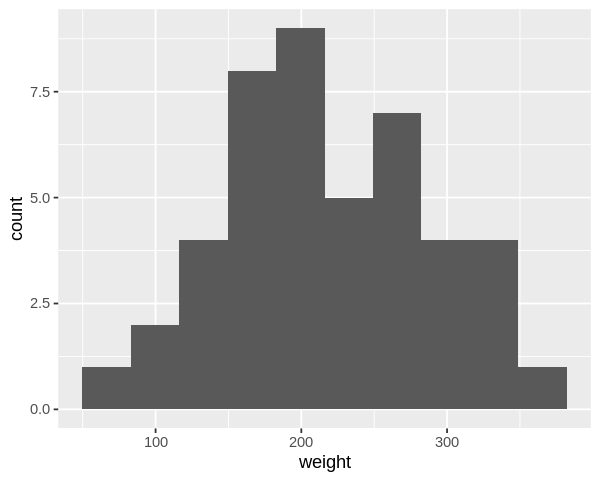

In [40]:
# with piping
ChickWeight %>%
    filter(Time == max(Time)) %>%
    ggplot(aes(x = weight)) +
        geom_histogram(bins = 10)

Adding color allows us to distinguish between the different diets.

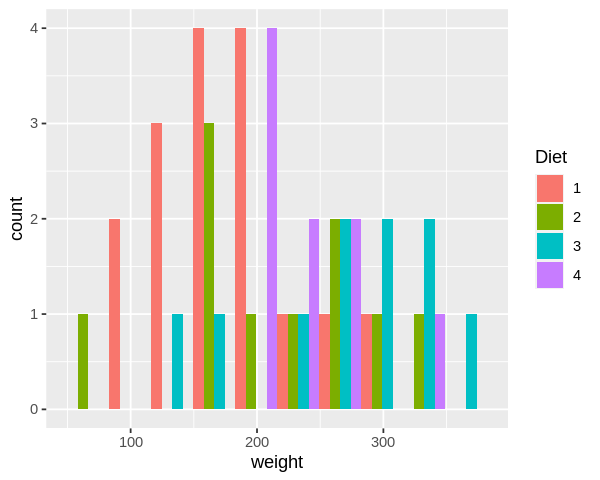

In [47]:
# with piping
ChickWeight %>%
    filter(Time == max(Time)) %>%
    ggplot(aes(x = weight, fill = Diet)) +
        geom_histogram(bins = 10, position = "dodge")

## Scatter Plots

`ggplot(DATA_FRAME, aes(x = COLUMN_1, y = COLUMN_2)) + geom_point()`

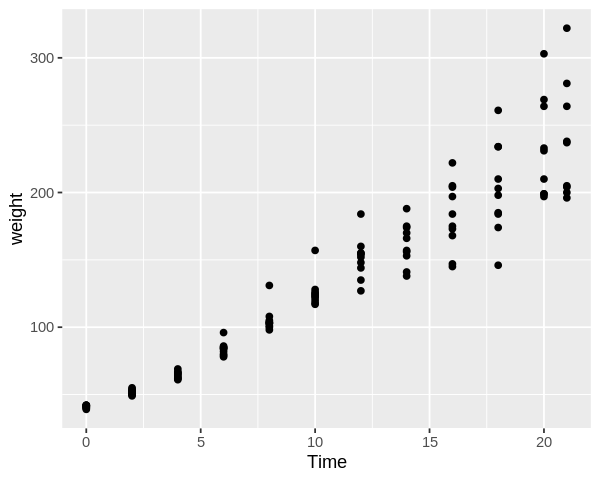

In [23]:
# with piping
ChickWeight %>%
    filter(Diet == 4) %>%
    ggplot(aes(x = Time, y = weight)) +
        geom_point()

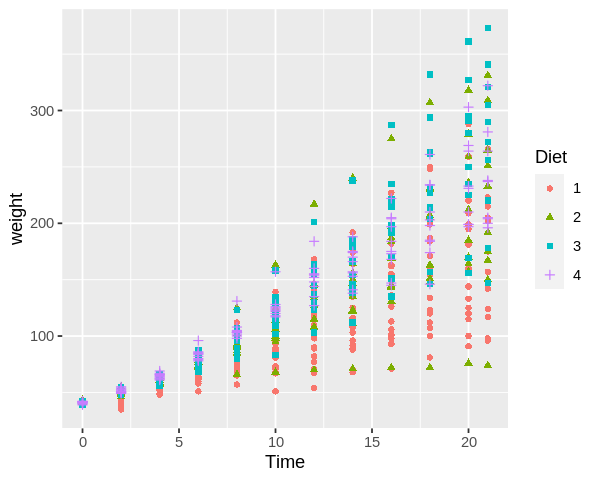

In [8]:
ggplot(ChickWeight, aes(x=Time, y=weight, color=Diet, shape=Diet)) + geom_point()

### Box plots

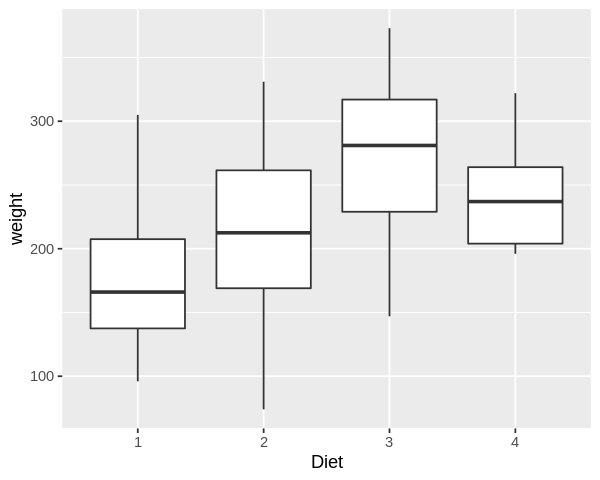

In [38]:
ChickWeight %>%
    filter(Time == max(Time)) %>%
    ggplot(aes(x = Diet, y = weight)) +
        geom_boxplot()